In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.rcParams['figure.figsize'] = [9, 6]

import PHELPH
import ELPH_utils


kmax = 2.5
n_kmax = 100

tmax = 10000
n_tmax = 1001
t_vec = np.linspace(0,tmax,n_tmax)

system = PHELPH.PHELPH(kmax=kmax, n_kmax=n_kmax)

#v2
system.g_photon = 0.02
system.tau_photon = 200
system.E_photon = 0.0175
system.linewidth = 0.005

# #v3
# system.g_photon = 0.01
# system.tau_photon = 500
# system.E_photon = 0.0175
# system.linewidth = 0.005

# #v4
# system.g_photon = 0.0
# system.tau_photon = 500
# system.E_photon = 0.0175
# system.linewidth = 0.005

system.setup_laser()

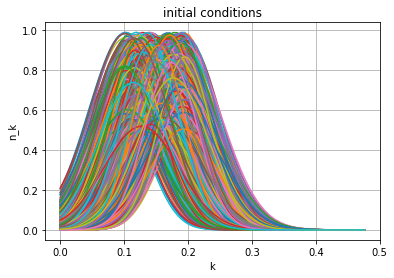

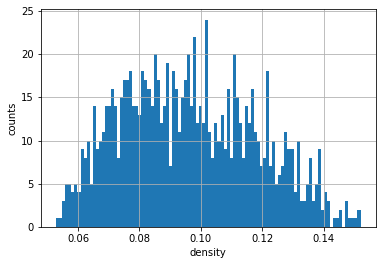

In [2]:
n_runs = 1000

rng = np.random.default_rng(817)

paras = np.zeros((n_runs,3))

paras[:,0] = rng.uniform(low=0.1, high=0.2, size=n_runs) #position
paras[:,1] = rng.uniform(low=0.04, high=0.06, size=n_runs) #width
paras[:,2] = 0.025 #density

inits = ELPH_utils.get_gaussian_inits(system, paras)

for r in range(n_runs):
    dist_max = np.amax(inits[r][:system.n_kmax])
#     inits[r][:n_kmax] *= 0.95 / dist_max
    inits[r][:system.n_kmax] *= rng.uniform(low=0.5, high=.99) / dist_max
    paras[r,2] = system.get_electron_density(inits[r][:system.n_kmax])

    
plt.grid()
for r in range(n_runs):
    plt.plot(system.E_el_vec,inits[r][:system.n_kmax])
plt.xlabel('k')
plt.ylabel('n_k')
plt.title('initial conditions')
plt.show()

plt.grid()
plt.hist(paras[:,2],bins=n_runs//10)
plt.xlabel('density')
plt.ylabel('counts')
plt.show()

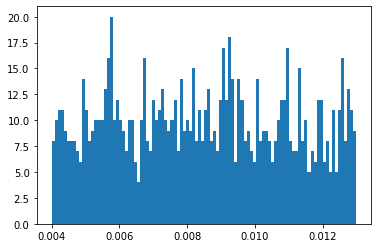

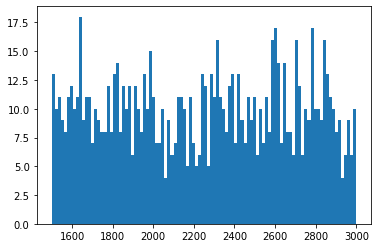

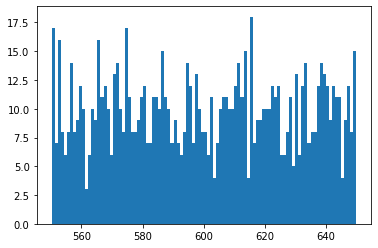

In [3]:
# Imax = rng.normal(loc=0.0085, scale=0.0036, size=n_runs)
Imax = rng.uniform(low=0.004, high=0.013, size=n_runs) 
Ipos = rng.uniform(low=1500, high=3000, size=n_runs) 
Iwidth = rng.uniform(low=550, high=650, size=n_runs)

plt.hist(Imax,bins=n_runs//10)
plt.show()

plt.hist(Ipos,bins=n_runs//10)
plt.show()

plt.hist(Iwidth,bins=n_runs//10)
plt.show()


In [ ]:
I_trajectory_list = []
el_trajectory_list = []
el_scattering_list = []

for j in range(len(inits)):
    print('run ', j+1)
    
    system.extI = True
    system.extI_max = Imax[j]
    system.extI_pos = Ipos[j]
    system.extI_width = Iwidth[j]
    
    trajectory = system.get_full_trajectory(inits[j], tmax=tmax, n_tmax=n_tmax)
    
    I_trajectory_list.append(trajectory[:,-1])
    el_trajectory_list.append(trajectory[:,:system.n_kmax])
    
    el_scattering = np.zeros_like(trajectory[:,:system.n_kmax])
    for m in range(el_scattering.shape[0]):
        el_scattering[m] = system.get_electron_scattering_terms(trajectory[m])
        
    el_scattering_list.append(el_scattering)

run  1
run  2
run  3


In [ ]:
ELPH_utils.save_trajectories(I_trajectory_list, filename='../../PHELPH_I_kmax2.5_nkmax_100_n1000_v6')
ELPH_utils.save_trajectories(el_trajectory_list, filename='../../PHELPH_el_kmax2.5_nkmax_100_n1000_v6')
ELPH_utils.save_trajectories(el_scattering_list, filename='../../PHELPH_el_scat_kmax2.5_nkmax_100_n1000_v6')

In [ ]:
for I in I_trajectory_list:
    plt.plot(I)
    
plt.show()

In [ ]:
ind = 0

print(Ipos[ind])

plt.plot(t_vec/1000,I_trajectory_list[ind])
plt.show()


plt.pcolormesh(t_vec/1000, system.E_el_vec, el_trajectory_list[ind].T,cmap='Reds')
plt.colorbar()
# plt.xlim(0,10)
plt.show()

plt.pcolormesh(t_vec/1000, system.E_el_vec, el_scattering_list[ind].T,
               cmap='bwr',
               norm=colors.CenteredNorm(vcenter=0.0))
plt.colorbar()
plt.show()